# **Data Overview**

## **0. Import Libraries**

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

---
## **1. Import Data**

In [199]:
orders = pd.read_csv('../data/raw/train/df_Orders.csv')
order_items = pd.read_csv('../data/raw/train/df_OrderItems.csv')
customers = pd.read_csv('../data/raw/train/df_Customers.csv')
payments = pd.read_csv('../data/raw/train/df_Payments.csv')
products = pd.read_csv('../data/raw/train/df_Products.csv')

## **2. Data Preview**

### Orders Data (df_Orders.csv)

- **Shape:** (89316 rows, 7 columns)
- **Nulls:** *order_approved_at* has 9 (all are valid orders), *order_delivered_timestamp* has 1889 nulls.
- **Unique Keys:** order_id
- **Order statuses:** 'delivered', 'canceled', 'shipped', 'processing', 'invoiced', 'unavailable', 'approved'
- **Data types:**
    - order_id & customer_id should be strings.
    - order_status should be categorical.
    - estimated_delivery_date should be date.
    - rest should be datetime.
- **Notes:**
    - data types currently are objects; timestamps need conversion to datetime and IDs to string.
    - order_id is primary key & customer_id is foreign key.
    - No repeat customers (no of customer_id = no of order_id).
    - No duplicate rows.
    - ❗contains only 292 rows from october 2016 which is a small, incomplete subset of data & may act as noise and can be removed.
    - Filter out rarely occurring statuses (approved) (but may be used in analysis) - they may skew results.
    - remove rows with 'unavailable' status as it is irrelevant.
    - 'shipped' without delivery_timestamp is sus, may include in delivery time analysis, maybe remove.
    - remove outliers in datetimes after checking each.
    - these issues will be addressed in the data cleaning phase before merging and deeper analysis.
---

In [6]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18


In [3]:
print(orders.shape)

(89316, 7)


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [48]:
# 👇🏻 Here top refers to the most frequent value & freq is frequency of 'top' value
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
count,89316,89316,89316,89316,89307,87427,89316
unique,89316,89316,7,72775,68215,71143,444
top,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-14 12:46:18,2017-12-20
freq,1,1,87428,87,87,87,500


In [31]:
orders['order_status'].unique()

array(['delivered', 'canceled', 'shipped', 'processing', 'invoiced',
       'unavailable', 'approved'], dtype=object)

In [15]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_timestamp        object
order_estimated_delivery_date    object
dtype: object

In [22]:
# for col in orders.columns:
#     try:
#         orders[col] = pd.to_numeric(orders[col])
#     except ValueError:
#         pass  # Skip columns that can't be converted

In [49]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
dtype: int64

In [5]:
orders.duplicated().sum()

0

In [51]:
# number of unique entries
orders.nunique()

order_id                         89316
customer_id                      89316
order_status                         7
order_purchase_timestamp         72775
order_approved_at                68215
order_delivered_timestamp        71143
order_estimated_delivery_date      444
dtype: int64

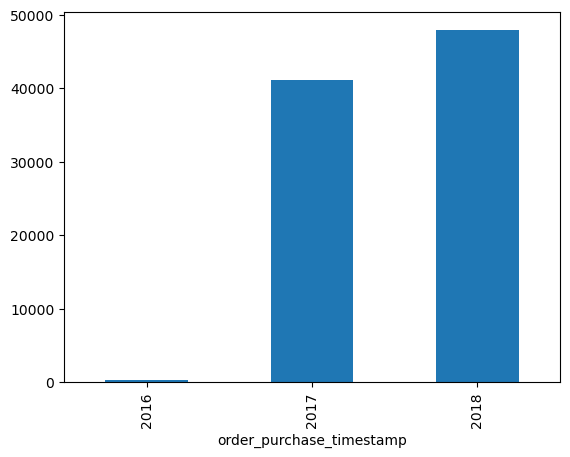

In [78]:
# to be removed as plotting & data type changing are part of data_cleaning
# here just trying to figure out problems with data
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_purchase_timestamp'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.show()

In [76]:
orders[orders['order_purchase_timestamp'].dt.year == 2016].

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
303,YTg0u33hKRJZ,eGMfCgBLlg0f,delivered,2016-10-06 16:13:30,2016-10-06 16:51:46,2016-10-13 16:51:46,2016-11-28
420,6EBIqp1t8jl5,PSsOpTjyt9Wi,delivered,2016-10-06 08:58:04,2016-10-06 16:08:04,2016-11-08 13:08:37,2016-11-28
1072,dKgztiB6hmk0,zW20fFCnkKD3,delivered,2016-10-08 17:43:26,2016-10-13 21:09:06,2016-10-26 12:58:25,2016-12-14
1091,MUj9ocKZaBtm,WHZShDFJhbJV,delivered,2016-10-08 11:33:25,2016-10-08 13:19:54,2016-10-15 13:19:54,2016-12-06
1137,GiPtraF6W5SW,v6gia1ruRFU5,delivered,2016-10-06 22:34:03,2016-10-06 23:11:27,2016-10-18 20:23:49,2016-11-28
...,...,...,...,...,...,...,...
87043,oJAhM8qLZsn5,qNDUgtxXJsol,shipped,2016-10-05 14:36:55,2016-10-06 15:53:06,NaN,2016-11-29
88412,pGztNGEdu1Bh,kkw7MhILCVEO,delivered,2016-10-05 17:11:49,2016-10-06 15:54:57,2016-10-31 21:41:43,2016-11-29
88474,vs49HIarg6f9,DWA2f8kChfph,delivered,2016-10-05 17:09:07,2016-10-06 15:50:35,2016-11-07 13:55:07,2016-11-29
88733,jWFgVdc0dfcX,itMwBWoT4tkG,delivered,2016-10-08 13:54:03,2016-10-08 16:34:43,2016-10-15 16:34:44,2016-11-30


In [77]:
orders[(orders['order_purchase_timestamp'].dt.year == 2016) & (orders['order_purchase_timestamp'].dt.month == 10)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
303,YTg0u33hKRJZ,eGMfCgBLlg0f,delivered,2016-10-06 16:13:30,2016-10-06 16:51:46,2016-10-13 16:51:46,2016-11-28
420,6EBIqp1t8jl5,PSsOpTjyt9Wi,delivered,2016-10-06 08:58:04,2016-10-06 16:08:04,2016-11-08 13:08:37,2016-11-28
1072,dKgztiB6hmk0,zW20fFCnkKD3,delivered,2016-10-08 17:43:26,2016-10-13 21:09:06,2016-10-26 12:58:25,2016-12-14
1091,MUj9ocKZaBtm,WHZShDFJhbJV,delivered,2016-10-08 11:33:25,2016-10-08 13:19:54,2016-10-15 13:19:54,2016-12-06
1137,GiPtraF6W5SW,v6gia1ruRFU5,delivered,2016-10-06 22:34:03,2016-10-06 23:11:27,2016-10-18 20:23:49,2016-11-28
...,...,...,...,...,...,...,...
87043,oJAhM8qLZsn5,qNDUgtxXJsol,shipped,2016-10-05 14:36:55,2016-10-06 15:53:06,NaN,2016-11-29
88412,pGztNGEdu1Bh,kkw7MhILCVEO,delivered,2016-10-05 17:11:49,2016-10-06 15:54:57,2016-10-31 21:41:43,2016-11-29
88474,vs49HIarg6f9,DWA2f8kChfph,delivered,2016-10-05 17:09:07,2016-10-06 15:50:35,2016-11-07 13:55:07,2016-11-29
88733,jWFgVdc0dfcX,itMwBWoT4tkG,delivered,2016-10-08 13:54:03,2016-10-08 16:34:43,2016-10-15 16:34:44,2016-11-30


In [75]:
orders[(orders['order_purchase_timestamp'].dt.year == 2016) & (orders['order_purchase_timestamp'].dt.month == 12)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
37529,ezJoPcVfVLtu,SVFYn5WoQXWR,delivered,2016-12-23 23:16:47,2016-12-23 23:31:37,2016-12-28 15:54:44,2017-01-19


In [81]:
orders['order_status'].value_counts()

order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64

In [84]:
orders[orders['order_status']=='approved']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
50482,nFUAefooRC5T,yIZBidEnNsKQ,approved,2017-02-06 20:18:17,2017-02-06 20:30:19,NaN,2017-03-01
86222,LjWhGg1TVezI,Jv5fFDI3UHFe,approved,2017-04-25 01:25:34,2017-04-30 20:32:41,NaN,2017-05-22


In [87]:
orders[orders['order_status']=='unavailable']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
27354,XqR4O0oNMf1a,9UJ1aOlbghS0,unavailable,2016-10-05 17:21:29,2016-10-06 15:55:40,NaN,2016-11-29
69032,kKaE4dz8vxCX,sXwZh5W7f7cW,unavailable,2016-10-07 18:16:31,2016-10-07 18:53:48,NaN,2016-12-07


In [89]:
orders[orders['order_status']=='invoiced']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
764,WMPT0F2OZ6fm,XkxI5wF3CHFt,invoiced,2018-08-06 20:17:25,2018-08-06 20:30:10,NaN,2018-08-09
1075,4uoqgIkXqGxH,Lh9UOxXWBOCd,invoiced,2017-06-13 15:24:53,2017-06-13 15:43:07,NaN,2017-07-11
1350,7r3sBb2Icbsk,LrJ4Gk0VPFsG,invoiced,2017-08-31 23:17:32,2017-08-31 23:30:11,NaN,2017-09-14
1566,X5jvaiRNqfC8,8jE768PGNEJQ,invoiced,2018-01-07 16:19:04,2018-01-07 16:26:19,NaN,2018-01-24
1790,zYhNzWwP5chK,TwFa1n4WOdjf,invoiced,2018-07-24 15:51:16,2018-07-24 16:05:10,NaN,2018-08-15
...,...,...,...,...,...,...,...
86513,Lo84cduP3Kda,79hNRUWtdNHW,invoiced,2017-04-05 13:25:31,2017-04-05 13:35:14,NaN,2017-04-28
87310,WLzqeGb9OFi0,OzAI6rjPlKRN,invoiced,2018-01-19 15:18:41,2018-01-19 16:06:32,NaN,2018-03-13
87722,RniJZIyBAvY7,cgaIMsqRIxsQ,invoiced,2017-04-29 08:07:48,2017-04-29 08:15:14,NaN,2017-05-30
88082,zJxzlY2vYP8g,dUYQFNE9q8k6,invoiced,2017-11-11 13:14:53,2017-11-11 13:30:33,NaN,2017-12-01


In [96]:
len(orders[(orders['order_status'] == 'invoiced') & (orders['order_delivered_timestamp'].isna())])

266

In [102]:
orders[orders['order_approved_at'].isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
10788,4Itts2TBUQzs,Z3dI7uRBfJOD,delivered,2017-02-17 13:05:55,NaN,2017-03-02 11:09:19,2017-03-20
16137,6MPB830Ufh0n,SOtqXN1MqcLj,delivered,2017-02-17 17:21:55,NaN,2017-03-03 12:16:03,2017-03-20
28951,lqW95yj4n1Qd,jCPmhkcyVR1z,delivered,2017-02-18 15:52:27,NaN,2017-03-07 13:57:47,2017-03-29
30494,dn1i9D4DFVZ2,Es95IGZCDDXy,delivered,2017-02-17 15:53:27,NaN,2017-03-03 11:47:47,2017-03-23
41752,vBZCEuCG9Hf1,zHEH7vdeO6UZ,delivered,2017-02-18 11:04:19,NaN,2017-03-02 16:15:23,2017-03-22
42772,PXwPIjmXCehX,gjKhFw8AFnW1,delivered,2017-02-18 16:48:35,NaN,2017-03-09 07:28:47,2017-03-31
47768,Yg9HDkWtA3Q3,GFg4QWN26cLs,delivered,2017-02-19 01:28:47,NaN,2017-03-02 03:41:58,2017-03-27
59434,hynO4uEubWbe,QdQBjy8APVMg,delivered,2017-02-18 14:40:00,NaN,2017-03-01 13:25:33,2017-03-17
65247,Uso7EoEPMrLU,rKJOxQc2PTfc,delivered,2017-01-19 22:26:59,NaN,2017-02-06 14:22:19,2017-03-16


In [105]:
test_df = orders[orders['order_delivered_timestamp'].isna()]
test_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
15,P5R6jr1qZdh4,FrEvnEiMKGpr,canceled,2017-07-24 11:38:43,2017-07-24 11:50:18,NaN,2017-08-07
41,C21fWds5zL0W,iFsAJRrzVaTS,shipped,2017-02-04 12:58:55,2017-02-04 13:10:38,NaN,2017-03-15
86,vSug5AqRo9gE,oWBBqGwqpx4m,shipped,2017-05-07 10:22:58,2017-05-09 09:35:20,NaN,2017-06-12
89,2HQ26ShSPhCA,uvuFFZDOAlU7,canceled,2017-07-29 12:56:17,2017-07-29 13:05:18,NaN,2017-08-18
133,1By8LOosrvF2,grsbZ5L1H5ty,canceled,2017-11-06 15:47:20,2017-11-07 07:30:29,NaN,2017-11-28
...,...,...,...,...,...,...,...
89196,VP3EBMExdh7K,acB2XNtto2SX,shipped,2018-01-24 18:19:18,2018-01-24 18:37:41,NaN,2018-03-01
89226,0jPFvDPItbRN,Hb5m8q1YZEfv,canceled,2017-08-02 14:08:18,2017-08-02 14:23:13,NaN,2017-08-24
89234,QzxMjvdMpOEI,yCbzy1m4tTUA,shipped,2017-09-15 09:05:41,2017-09-15 09:15:13,NaN,2017-10-05
89262,rnnNWGgyHsA5,6LYRxLvrUzNy,canceled,2017-12-13 12:55:38,2017-12-13 13:11:58,NaN,2018-01-02


In [112]:
test_df['order_status'].value_counts()
# flagging shipped with no delivery here, prolly a glitch

order_status
shipped        936
canceled       404
processing     273
invoiced       266
delivered        6
unavailable      2
approved         2
Name: count, dtype: int64

In [155]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
difference = (orders['order_approved_at'] - orders['order_purchase_timestamp']).dropna()
((difference.dt.total_seconds()/3600) > 785).sum()
# difference.mean()
# difference.max()

1

---

### Order Items Data (df_OrderItems.csv)

- **Shape:** (89316 rows, 5 columns)
- **Nulls:** *None*
- **Unique Keys:** order_id
- **Data types:**
    - order_id, product_id & seller_id: should be strings.
    - price is numeric & shipping_charges: should be numeric.
- **Statistical summary:** Refer to ***order_items.describe()*** for price & shipping insights.
- **Notes:**
    - data types currently set as object; need conversion.
    - order_id is primary key and, seller_id & product_id are foreign keys.
    - some outliers in price exist, investigate with product category to understand the context & if they should be removed or not.
    - No duplicate rows detected.
---

In [156]:
order_items.head()

,order_id,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66


In [157]:
print(order_items.shape)

(89316, 5)


In [158]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [159]:
# 👇🏻 Here top refers to the most frequent value & freq is frequency of 'top' value
order_items.describe()

,price,shipping_charges
count,89316.000000,89316.000000
mean,340.900543,44.283210
std,557.459897,37.672491
min,0.850000,0.000000
25%,59.650000,20.110000
50%,136.900000,35.055000
75%,399.200000,57.190000
max,6735.000000,409.680000


In [162]:
order_items.dtypes

order_id             object
product_id           object
seller_id            object
price               float64
shipping_charges    float64
dtype: object

In [163]:
order_items.isnull().sum()

order_id            0
product_id          0
seller_id           0
price               0
shipping_charges    0
dtype: int64

In [164]:
order_items.duplicated().sum()

0

In [165]:
order_items.nunique()

order_id            89316
product_id          27451
seller_id            2929
price                5235
shipping_charges     6327
dtype: int64

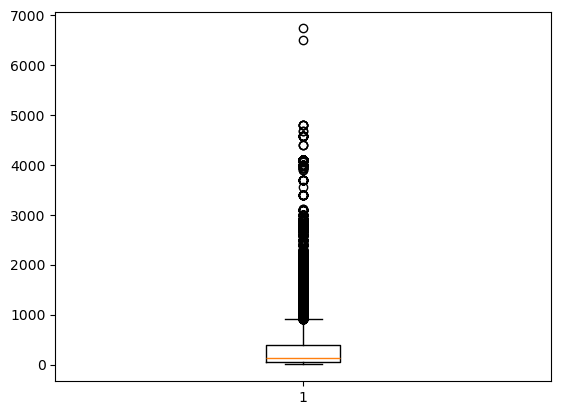

In [187]:
# remove plots as it belongs to cleaning & exporation part 
plt.boxplot(order_items['price'])
plt.show()

In [181]:
order_items[order_items['price'] > 5000]

,order_id,product_id,seller_id,price,shipping_charges
28299,aPnggTzFcusk,7tZV2OpLVZHg,nt1w9AssyxfU,6499.0,70.06
45436,SwjsVBeUO9OM,HiyKPuVcad18,4SWsneYKnFcc,6735.0,3.82


In [185]:
len(order_items[order_items['price'] > 4500])

28

In [186]:
len(order_items[order_items['price'] > 4000])

423

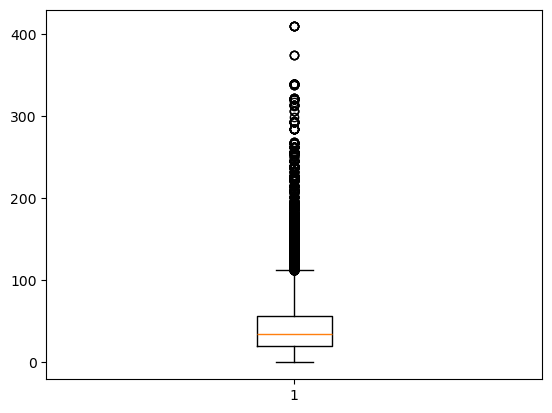

In [188]:
# remove plots as it belongs to cleaning & exporation part 
plt.boxplot(order_items['shipping_charges'])
plt.show()

---

### Customers Data (df_Customers.csv)

- **Shape:** (89316 rows, 4 columns)
- **Nulls:** *None*
- **Unique Keys:** customer_id
- **Data types:**
    - customer_zip_code_prefix: currently int, should be converted to string.
    - rest, all should be strings.
- **Notes:**
    - convert the data type of zip_code_prefix to string, its misleading being an integer.
    - rest data types are currently object, should be converted to string.
    - customer_id is the primary key.
    - No repeat customers (no of customer_id = no of order_id).
    - No duplicate rows detected.
  

In [201]:
customers.head()

,customer_id,customer_zip_code_prefix,customer_city,customer_state
0,hCT0x9JiGXBQ,58125,varzea paulista,SP
1,PxA7fv9spyhx,3112,armacao dos buzios,RJ
2,g3nXeJkGI0Qw,4119,jandira,SP
3,EOEsCQ6QlpIg,18212,uberlandia,MG
4,mVz5LO2Vd6cL,88868,ilhabela,SP


In [206]:
print(customers.shape)

(89316, 4)


In [207]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [209]:
customers.isnull().sum()

customer_id                 0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [211]:
customers.duplicated().sum()

0

In [212]:
customers.nunique()

customer_id                 89316
customer_zip_code_prefix    13930
customer_city                3735
customer_state                 27
dtype: int64

---

### Payments Data (df_Payments.csv)

- **Shape:** (89316 rows, 5 columns)
- **Nulls:** *None*.
- **Unique Keys:** order_id
- **Data types:**
    - order_id should be string.
    - payment_type should be categorical.
    - payment_value, payment_installments & payment_sequential should be numerical/float.
- **Notes:**
    - data types need correction before joins or aggregation.
    - order_id is the primary key (verified).
    - No duplicate rows detected.


In [213]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,1,credit_card,1,259.14
1,v6px92oS8cLG,1,credit_card,8,382.39
2,Ulpf9skrhjfm,1,credit_card,4,249.25
3,bwJVWupf2keN,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,1,credit_card,1,76.15


In [214]:
print(payments.shape)

(89316, 5)


In [215]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [220]:
payments['payment_value'].describe()

count    89316.000000
mean       268.657190
std        344.409566
min          0.000000
25%         84.340000
50%        171.860000
75%        313.530000
max       7274.880000
Name: payment_value, dtype: float64

In [243]:
payments['payment_sequential'].value_counts().sort_index()

payment_sequential
1     85400
2      2589
3       494
4       236
5       152
6       100
7        80
8        46
9        37
10       31
11       34
12       24
13       14
14       10
15       12
16        6
17        9
18        9
19        9
20        6
21        8
22        3
23        1
24        1
25        1
26        2
28        1
29        1
Name: count, dtype: int64

In [246]:
payments['payment_installments'].value_counts().sort_index()

payment_installments
0         3
1     44313
2     10325
3      8907
4      6032
5      4600
6      3580
7      1401
8      3927
9       560
10     5331
11       18
12      128
13       17
14       11
15       73
16        6
17        6
18       26
20       16
21       10
22        1
23        1
24       24
Name: count, dtype: int64

In [225]:
payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [226]:
payments.duplicated().sum()

0

In [235]:
payments.nunique()

order_id                89316
payment_sequential         28
payment_type                4
payment_installments       24
payment_value           25520
dtype: int64

---

### Products Data (df_Products.csv)

- **Shape:** (89316 rows, 6 columns)
- **Nulls:** *None*.
- **Unique Keys:** product_id (but duplicate rows exist, so those need to be removed)
- **Data types:**
    - order_id should be string.
    - product_category_name should be categorical.
    - all dimensions & product_weight_g should be numerical/float.
- **Notes:**
    - Data types require correction before aggregation or joins.
    - product_id is the primary key.
    - Too many (61865) duplicate rows. Drop duplicate rows & retain 27,451 unique products only.
    - One category is missing — check if it contains anomalies or pricing outliers.
  

In [247]:
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,90K0C1fIyQUf,toys,491.0,19.0,12.0,16.0
1,qejhpMGGVcsl,watches_gifts,440.0,18.0,14.0,17.0
2,qUS5d2pEAyxJ,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,639iGvMyv0De,toys,1450.0,68.0,3.0,48.0
4,1lycYGcsic2F,toys,300.0,17.0,4.0,12.0


In [248]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [249]:
print(products.shape)

(89316, 6)


In [250]:
products.isnull().sum()

product_id                 0
product_category_name    308
product_weight_g          15
product_length_cm         15
product_height_cm         15
product_width_cm          15
dtype: int64

In [251]:
products.duplicated().sum()

61865

In [252]:
products.nunique()

product_id               27451
product_category_name       70
product_weight_g          2020
product_length_cm           99
product_height_cm          101
product_width_cm            93
dtype: int64

In [253]:
products['product_category_name'].unique()

array(['toys', 'watches_gifts', 'costruction_tools_garden',
       'bed_bath_table', 'auto', 'health_beauty', 'cool_stuff',
       'garden_tools', 'furniture_decor', 'fashion_shoes',
       'sports_leisure', 'baby', 'housewares',
       'construction_tools_construction', 'electronics',
       'home_appliances', 'audio', 'consoles_games', 'stationery',
       'furniture_living_room', 'computers_accessories', 'perfumery',
       'kitchen_dining_laundry_garden_furniture',
       'fashion_bags_accessories', 'market_place', 'telephony',
       'home_construction', nan, 'office_furniture',
       'industry_commerce_and_business', 'food_drink', 'drinks',
       'agro_industry_and_commerce', 'signaling_and_security', 'food',
       'pet_shop', 'luggage_accessories', 'home_appliances_2',
       'small_appliances', 'tablets_printing_image',
       'construction_tools_lights', 'musical_instruments', 'home_confort',
       'air_conditioning', 'construction_tools_safety',
       'costruction_tools_

In [261]:
products['product_category_name'].isna().sum()

308

In [254]:
products[products['product_category_name'].isna()]

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
329,6cDVtksZH7KU,NaN,200.0,16.0,2.0,11.0
1037,z6g5uM3fiCVO,NaN,300.0,30.0,6.0,12.0
1179,N6XMQZiwCJ3t,NaN,600.0,24.0,4.0,15.0
1589,W3IIy0dnIfkU,NaN,200.0,16.0,2.0,11.0
3061,Z2X9RgoeYqaj,NaN,6250.0,28.0,34.0,40.0
...,...,...,...,...,...,...
88099,5gjt2T2OSHe3,NaN,200.0,22.0,14.0,14.0
88282,RlHxglMXV69Y,NaN,200.0,16.0,10.0,13.0
88312,vLQWWPXCmqA7,NaN,300.0,35.0,7.0,12.0
88640,nAfiZ93td5vY,NaN,17100.0,42.0,80.0,30.0


In [257]:
products['product_category_name'].value_counts()

product_category_name
toys                                 67027
health_beauty                         2351
bed_bath_table                        2146
sports_leisure                        1837
furniture_decor                       1760
                                     ...  
fashion_childrens_clothes                2
security_and_services                    1
furniture_mattress_and_upholstery        1
home_comfort_2                           1
diapers_and_hygiene                      1
Name: count, Length: 70, dtype: int64